In [ ]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import sklearn #For generating some matrices
import pandas as pd #For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics
import pickle #if you want to save layouts
import os
import io

import networkx as nx

%matplotlib inline

import torch # pip install torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertConfig # pip install tranformers==2.4.1
from transformers import AdamW, BertForSequenceClassification
from tqdm import tqdm, trange

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that use ConvoKit to analyze a Corpus other than 'subreddit-Cornell', including at least one function you find in the package not used above. You can also generate a ConvoKit Corpus from your own dataset based on [their Corpus from .txt files tutorial](https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/converting_movie_corpus.ipynb) or [their Corpus from pandas tutorial](https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/corpus_from_pandas.ipynb), but that may be time-consuming for a weekly assignment. (It could be a great idea for your final project!)

In [46]:
corpus = Corpus(download('reddit-corpus-small'))

In [47]:
corpus.print_summary_stats()

Number of Speakers: 119889
Number of Utterances: 297132
Number of Conversations: 8286


In [51]:
subreddit = []
for utt in corpus.iter_utterances():
    #print(utt.meta['subreddit'])
    #break 
    if utt.meta['subreddit'] not in subreddit:
        subreddit.append(utt.meta['subreddit'])

In [52]:
subreddit

['singapore',
 'tifu',
 'cringepics',
 'motorcycles',
 'TwoXChromosomes',
 'hockey',
 'sex',
 'Christianity',
 'conspiracy',
 'canada',
 'pokemontrades',
 'Guildwars2',
 'askscience',
 'IAmA',
 'australia',
 'relationships',
 'Bitcoin',
 'business',
 'electronic_cigarette',
 'MMA',
 'DebateReligion',
 'skyrim',
 'movies',
 'WTF',
 'Android',
 'OkCupid',
 'Frugal',
 'anime',
 'todayilearned',
 'Fitness',
 'SquaredCircle',
 'photography',
 'hiphopheads',
 'POLITIC',
 'apple',
 'science',
 'AskMen',
 'pokemon',
 'offbeat',
 'Games',
 'Minecraft',
 'guns',
 'AskWomen',
 'politics',
 'technology',
 'wow',
 'Music',
 'tf2',
 'cringe',
 'techsupport',
 'news',
 'cars',
 'MensRights',
 'malefashionadvice',
 'buildapc',
 'worldnews',
 'gifs',
 'soccer',
 'asoiaf',
 'explainlikeimfive',
 'dayz',
 'books',
 'relationship_advice',
 'aww',
 'gonewild',
 'fantasyfootball',
 'unitedkingdom',
 'AmItheAsshole',
 'MovieDetails',
 'nfl',
 'AdviceAnimals',
 'programming',
 'Drugs',
 'ShingekiNoKyojin',
 '

In [53]:
corpus.get_speakers_dataframe().head()

,vectors,meta.num_posts,meta.num_comments
id,,,
AutoModerator,[],200,27
rt2236,[],1,0
Im_Tsuikyit,[],2,7
mamypokopants,[],1,0
XanPercyCheck,[],1,6


In [54]:
corpus.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,meta.subreddit,meta.stickied,meta.permalink,meta.author_flair_text,vectors
id,,,,,,,,,,,,,,,
9c716m,1535839576,"Talk about your day. Anything goes, but subred...",AutoModerator,None,9c716m,13,None,1540061887,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",singapore,False,/r/singapore/comments/9c716m/rsingapore_random...,,[]
9c8amk,1535850650,I went to visit a few days ago and Ioved it. I...,rt2236,None,9c8amk,20,None,1540062482,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",singapore,False,/r/singapore/comments/9c8amk/what_are_your_big...,,[]
9ca0yk,1535868569,"One time, my family and I had just returned fr...",Im_Tsuikyit,None,9ca0yk,49,None,1540063311,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",singapore,False,/r/singapore/comments/9ca0yk/worst_taxi_driver...,Next 4D Draw Prediction: 2881,[]
9cfz10,1535925965,"Talk about your day. Anything goes, but subred...",AutoModerator,None,9cfz10,17,None,1540066068,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",singapore,False,/r/singapore/comments/9cfz10/rsingapore_random...,,[]
9crqp2,1536029129,,mamypokopants,None,9crqp2,46,None,1540071557,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",singapore,False,/r/singapore/comments/9crqp2/pj_thum_says_he_i...,,[]


In [55]:
corpus.get_conversations_dataframe().head()

,vectors,meta.title,meta.num_comments,meta.domain,meta.timestamp,meta.subreddit,meta.gilded,meta.gildings,meta.stickied,meta.author_flair_text
id,,,,,,,,,,
9c716m,[],/r/singapore random discussion and small quest...,745,self.singapore,1535839576,singapore,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",False,
9c8amk,[],What are your biggest complaints about singapore?,79,self.singapore,1535850650,singapore,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",False,
9ca0yk,[],Worst taxi driver you’ve ever encountered?,65,self.singapore,1535868569,singapore,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",False,Next 4D Draw Prediction: 2881
9cfz10,[],/r/singapore random discussion and small quest...,905,self.singapore,1535925965,singapore,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",False,
9crqp2,[],"PJ Thum says he is not a traitor, but suspicio...",90,observer.news,1536029129,singapore,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",False,


In [56]:
utt = corpus.random_utterance()
convo = utt.get_conversation() # get the Conversation the Utterance belongs to
spkr = utt.speaker # get the Speaker who made the Utterance

In [57]:
spkr.get_utterances_dataframe().head()

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,meta.subreddit,meta.stickied,meta.permalink,meta.author_flair_text,vectors
id,,,,,,,,,,,,,,,
e6rpzys,1538096375,"Unfortunately, Reddit isn’t like that anymore....",Believe_Land,e6qqcs6,9jecoy,18,e6qqcs6,1539610706,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",todayilearned,False,/r/todayilearned/comments/9jecoy/til_of_the_ma...,,[]
e6rt7l6,1538099363,I’m not... I’m just pointing out the differenc...,Believe_Land,e6rrdpb,9jecoy,13,e6qqcs6,1539612227,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",todayilearned,False,/r/todayilearned/comments/9jecoy/til_of_the_ma...,,[]
e5e5jte,1536089422,"Except that same black guy got elected again, ...",Believe_Land,e5e3ugn,9cxfic,-24,e5dw09y,1538663681,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",worldnews,False,/r/worldnews/comments/9cxfic/president_trumps_...,,[]
e5e5q65,1536089577,It doesn’t sound like he’s denying that fact. ...,Believe_Land,e5e4tvl,9cxfic,4,e5dw09y,1538663755,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",worldnews,False,/r/worldnews/comments/9cxfic/president_trumps_...,,[]
e5e5yya,1536089791,What? I never said anything about Trump and th...,Believe_Land,e5e5u9a,9cxfic,-21,e5dw09y,1538663858,0,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",worldnews,False,/r/worldnews/comments/9cxfic/president_trumps_...,,[]


In [58]:
convo.print_conversation_structure(lambda utt: utt.id)

9cxfic
    e5dw09y
        e5dxvkc
            e5dynt1
                e5e1v8z
                    e5e23h5
                        e5e2kqa
                            e5e322b
                                e5e35u6
                                    e5ea9xk
                e5e5nz9
                e5el3no
            e5dyou2
                e5e0vqu
                    e5e139p
                        e5e2sc1
                            e5e311b
                            e5e3yyy
                                e5e5cgr
                                    e5ey7uv
                                        e5eyeet
                                e5elu8t
                            e5e46tt
                                e5edkfe
                                    e5ehsfm
                                e5ehyo3
                                    e5el268
                                e5eltbr
                                    e5eyw1n
                            e5e5h4d
                     

In [59]:
convo.print_conversation_structure()

stupidstupidreddit
    tank_trap
        Srslywhyumadbro
            MajorMajorObvious
                [deleted]
                    Tyxcee
                        where_is_the_cheese
                            Tyxcee
                                where_is_the_cheese
                                    TurtleKnyghte
                the_original_Retro
                allboolshite
            red286
                KBCme
                    CallMeMadScientist
                        Khiva
                            [deleted]
                            vancityvic
                                WeepingAngelTears
                                    SweetBearCub
                                        WeepingAngelTears
                                stehekin
                            Arcvalons
                                emmerick
                                    Draedron
                                KarmaRepellant
                                    butterscotch_yo
       

In [60]:
# Traverse the conversation tree in interesting ways
print("Breadth first:")
print([utt.speaker.id for utt in convo.traverse('bfs')],"\n")

print("Depth first:")
print([utt.speaker.id  for utt in convo.traverse('dfs')],"\n")

print("Preorder:")
print([utt.speaker.id  for utt in convo.traverse('preorder')],"\n")

print("Postorder:")
print([utt.speaker.id  for utt in convo.traverse('postorder')],"\n")

print("For reference, here is the structure of the thread again:")
convo.print_conversation_structure()

Breadth first:
['stupidstupidreddit', 'tank_trap', 'Srslywhyumadbro', 'The_Purple_Tomato', 'jschubart', 'extropia', 'Mralfredmullaney', 'Autarch_Kade', 'jahvidsanders44', '[deleted]', 'JacobCrim88', 'small_loan_of_1M', '[deleted]', 'bancoenchile', 'pooponagoose', 'RohdKill_PA', 'ferociousrickjames', 'Exitiabilis', 'haveatyee', 'Jesus_Hong', '_ass_burgers_', 'PhrozenWarrior', '[deleted]', 'DumNerds', 'lieutenantbunbun', 'Rumpullpus', 'SignalSecurity', 'mces97', 'Burkskidsmom5', 'madamz', 'AFlyingMexican5', 'Kharn0', 'Grimmginger', 'IAmOfficial', 'ch1burashka', 'ALoudMouthBaby', 'SaddestClown', 'littlemogmog', 'thankfuljosh', 'truthdoctor', '_Aj_', 'tagged2high', 'OriginalScrubLord', 'JZ_the_ICON', 'GrumpyYoungGit', 'Rednartso', 'DICKTracey', 'MajorMajorObvious', 'red286', 'wearer_of_boxers', 'VannAccessible', '[deleted]', 'strawnotrazz', 'imahsleep', 'Muscles_McGeee', 'MattiMoose333', '[deleted]', 'mlmayo', 'falconear', 'Theclown37', 'Son_Of_Borr_', 'DestroyerTerraria', 'MrDrool', 'robo

['stupidstupidreddit', 'tank_trap', 'Srslywhyumadbro', 'MajorMajorObvious', '[deleted]', 'Tyxcee', 'where_is_the_cheese', 'Tyxcee', 'where_is_the_cheese', 'TurtleKnyghte', 'the_original_Retro', 'allboolshite', 'red286', 'KBCme', 'CallMeMadScientist', 'Khiva', '[deleted]', 'vancityvic', 'WeepingAngelTears', 'SweetBearCub', 'WeepingAngelTears', 'stehekin', 'Arcvalons', 'emmerick', 'Draedron', 'KarmaRepellant', 'butterscotch_yo', 'LiddleBob', 'alicia3138', 'richinteriorworld', 'FreeJemHadar', '[deleted]', '[deleted]', 'buster2222', 'emmerick', 'Draedron', 'BooksandBiceps', 'oz6702', 'BooksandBiceps', 'idzero', 'HackrKnownAsFullChan', 'CallMeMadScientist', 'el_muerte17', 'a_monomaniac', 'snsv', 'VorpalLadel', 'Em_Adespoton', 'vingeran', 'Em_Adespoton', 'Cyborg_Mr_Rogers', 'MarsUAlumna', '[deleted]', 'emperor_tesla', 'PerishingSpinnyChair', 'Pervy_Uncle', 'Joetato', 'VorpalLadel', 'CFSohard', 'CrudelyAnimated', 'f_d', 'Throawwai', 'Clipsez', 'FreeJemHadar', '[deleted]', 'ApokalypseCow', 'bo

                                MikeTate77
                                6262018
                                eightyWon
                                [deleted]
                            SchmeckleConverter
                            TheDiscordedSnarl
                        Hey_There_Fancypants
                        itty53
                            Ralph-Hinkley
                                kinderdemon
                                LittleKingsguard
                                    itty53
                                        NotClever
                                    dandantian5
                                itty53
                                    Ralph-Hinkley
                                    EvaUnit01
                                PopsicleIncorporated
                                    Ralph-Hinkley
                                        SweetBearCub
                                            [deleted]
                            trylobite
     

In [61]:
# Get all conversational 'paths' (i.e. paths from root utterances to leaf utterances in this Conversation tree)
paths = convo.get_root_to_leaf_paths()
longest_paths = convo.get_longest_paths()

In [62]:
for path in longest_paths:
    print([utt.id for utt in path])
    #print([utt for utt in path])

['9cxfic', 'e5dw09y', 'e5e2gga', 'e5e3ugn', 'e5e5jte', 'e5e6bof', 'e5e7mhh', 'e5e8uk2', 'e5e94oq', 'e5e9lpp', 'e5eao4p', 'e5eas9w', 'e5eaxu9', 'e5eb820', 'e5ebcyh', 'e5ec6rt', 'e5ecuix', 'e5edjz2', 'e5eeal0']


In [63]:
[spkr.id for spkr in convo.get_chronological_speaker_list()] #use timestamps

['stupidstupidreddit',
 'tank_trap',
 'Srslywhyumadbro',
 'MajorMajorObvious',
 'red286',
 'KBCme',
 'MistaSmiles',
 'wearer_of_boxers',
 'CallMeMadScientist',
 'Katholikos',
 'The_Purple_Tomato',
 'OleKosyn',
 '[deleted]',
 'el_muerte17',
 'Tyxcee',
 '[deleted]',
 'a_monomaniac',
 'StorminNorman',
 'jschubart',
 'extropia',
 'where_is_the_cheese',
 'Son_Of_Borr_',
 'GnomePost',
 'snsv',
 'm1st3rw0nk4',
 'Khiva',
 'Khiva',
 'The_Purple_Tomato',
 'VorpalLadel',
 'InfinitePizzazz',
 '[deleted]',
 'Tyxcee',
 'zveroshka',
 'where_is_the_cheese',
 'CFSohard',
 'Throawwai',
 'Em_Adespoton',
 'GayFesh',
 'OpiumPhrogg',
 'Em_Adespoton',
 'helpusdrzaius',
 'Leitilumo',
 'vancityvic',
 'cycyc',
 'noriana',
 'Arcvalons',
 'postIntelligence',
 'CrudelyAnimated',
 'postIntelligence',
 'antoinedodson_',
 'zveroshka',
 'OleKosyn',
 'fullsaildan',
 'Clipsez',
 'Mr_BG',
 'Mralfredmullaney',
 'Autarch_Kade',
 'AdmiralRed13',
 'jahvidsanders44',
 'vingeran',
 'Imadethisuponthespot',
 'fyberoptyk',
 'fybe

In [64]:
from convokit import FightingWords
fw = FightingWords()

Initializing default CountVectorizer with ngram_range (1, 3)... Done.


In [66]:
fw.fit(corpus, class1_func = lambda utt: utt.meta['subreddit'] == 'Economics',
       class2_func = lambda utt: utt.meta['subreddit'] == 'business')

class1_func returned 3865 valid corpus components. class2_func returned 2588 valid corpus components.
Vocab size is 5349
Comparing language...
ngram zscores computed.


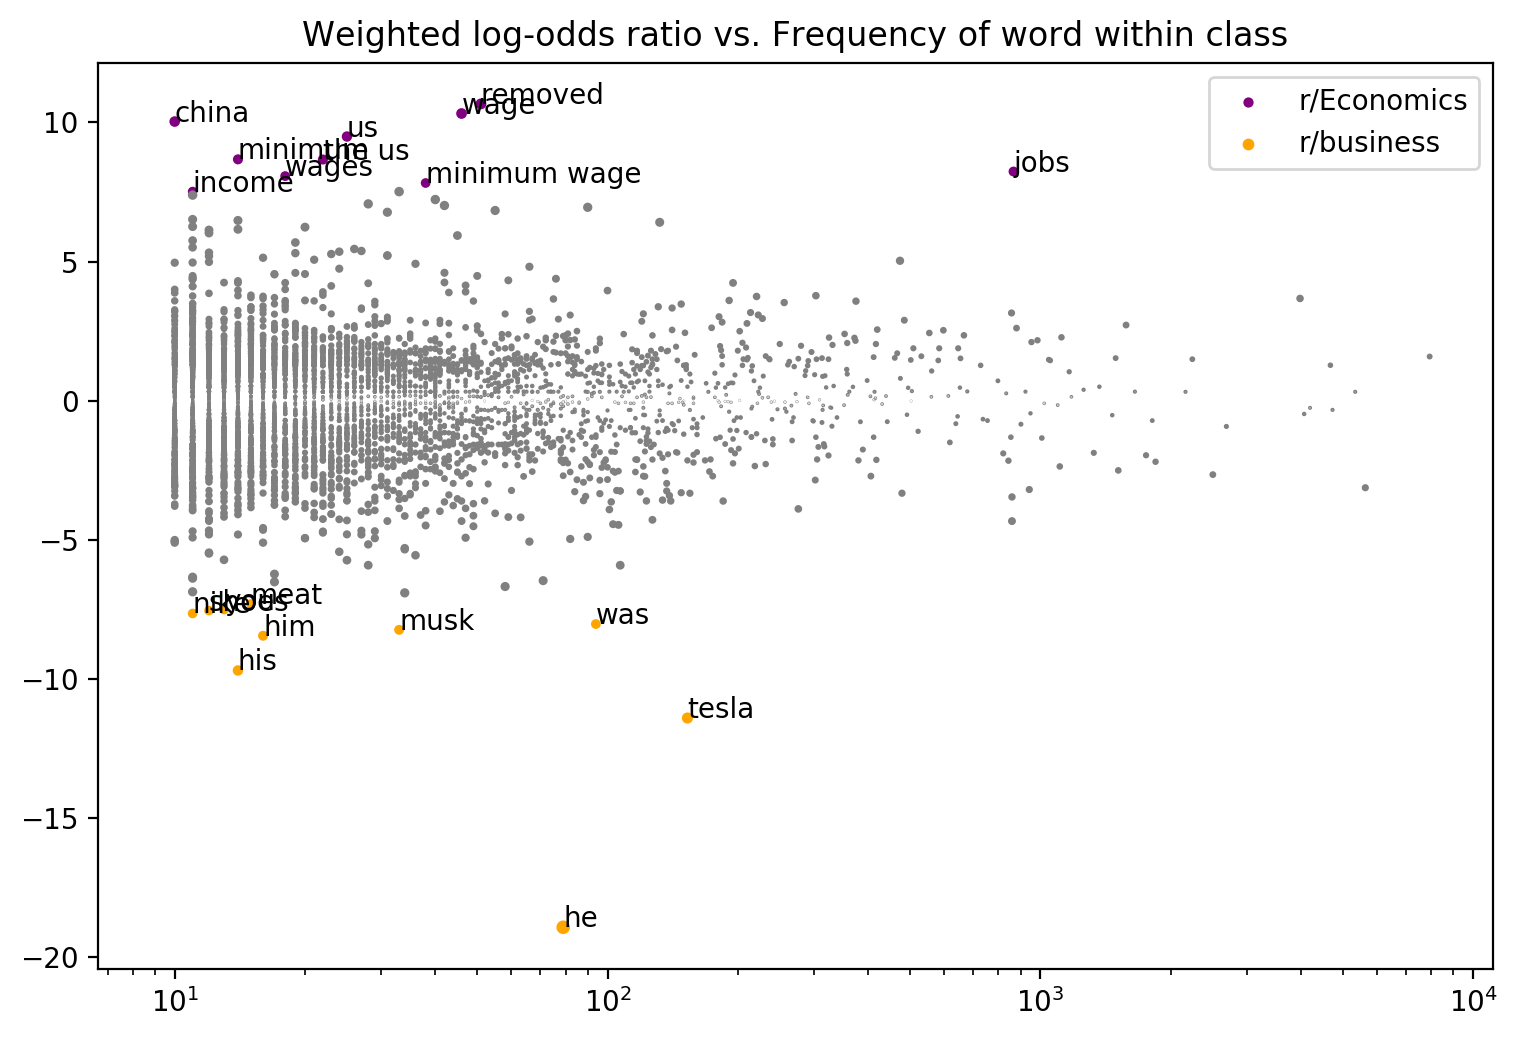

,z-score,class
ngram,,
he,-18.915403,r/business
tesla,-11.398638,r/business
his,-9.690140,r/business
him,-8.441796,r/business
musk,-8.229285,r/business
...,...,...
minimum,8.672816,r/Economics
us,9.492786,r/Economics
china,10.030541,r/Economics


In [67]:
fw.summarize(corpus, plot=True, class1_name='r/Economics', class2_name='r/business')

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that perform a similar social similarity or influence analysis on a dataset relevant to your final project. Create relationships between actors in a network based on your dataset (e.g., person to person or document to document), and perform analyses that interrogate the structure of their interactions, similarity, and/or influence on one another. (For example, if relevant to your final project, you could explore different soap operas, counting how many times a character may have used the word love in conversation with another character, and identify if characters in love speak like each other. Or do opposites attract?) What does that analysis and its output reveal about the relative influence of each actor on others? What does it reveal about the social game being played?

<font color="red">Stretch 1:
Render the social network with weights (e.g., based on the number of scenes in which actors appear together), then calculate the most central actors in the show.Realtime output can be viewed in shell.

<font color="red">Stretch 2:
Implement more complex measures of similarity based on the papers you have read.

In [152]:
corpus = Corpus(filename=download("friends-corpus"))

In [153]:
utt_df = corpus.get_utterances_dataframe()

In [156]:
lead_characters = utt_df['speaker'].value_counts()[:6].index

In [161]:
utt_df = utt_df[utt_df['speaker'].apply(lambda x: x in lead_characters)]
utt_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.tokens,meta.character_entities,meta.emotion,meta.caption,meta.transcript_with_note,meta.tokens_with_note,vectors
id,,,,,,,,,,,,
s01_e01_c01_u001,None,There's nothing to tell! He's just some guy I ...,Monica Geller,None,s01_e01_c01_u001,"[[There, 's, nothing, to, tell, !], [He, 's, j...","[[], [[0, 1, Paul the Wine Guy], [4, 5, Paul t...",None,None,None,None,[]
s01_e01_c01_u002,None,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01_e01_c01_u001,s01_e01_c01_u001,"[[C'mon, ,, you, 're, going, out, with, the, g...","[[[2, 3, Monica Geller], [8, 9, Paul the Wine ...",None,None,None,None,[]
s01_e01_c01_u003,None,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01_e01_c01_u002,s01_e01_c01_u001,"[[All, right, Joey, ,, be, nice, .], [So, does...","[[[2, 3, Joey Tribbiani]], [[2, 3, Paul the Wi...",None,None,None,None,[]
s01_e01_c01_u004,None,"Wait, does he eat chalk?",Phoebe Buffay,s01_e01_c01_u003,s01_e01_c01_u001,"[[Wait, ,, does, he, eat, chalk, ?]]","[[[3, 4, Paul the Wine Guy]]]",None,None,None,None,[]
s01_e01_c01_u006,None,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,s01_e01_c01_u005,s01_e01_c01_u001,"[[Just, ,, ', cause, ,, I, do, n't, want, her,...","[[[5, 6, Phoebe Buffay], [9, 10, Monica Geller...",None,None,None,None,[]


In [162]:
actor_network = nx.Graph()

for character in lead_characters:
        actor_network.add_node(character, words=[])

In [163]:
utt_df.loc['s01_e01_c01_u006']['speaker']

'Phoebe Buffay'

In [180]:
's01_e01_c01_u001' in utt_df.index

True

In [194]:
cnt = 0
for row in utt_df.iterrows():
    cnt+= 1
    #print(cnt)
    speaker = row[1]['speaker']
    receiver_id = row[1]['reply_to']
    #print(receiver_id)
    if receiver_id in utt_df.index:
        receiver = utt_df.loc[receiver_id]['speaker']
        if (speaker,receiver) not in actor_network.edges():
            actor_network.add_edge(speaker,receiver, weight=0)
        else:
            actor_network.edges[(speaker,receiver)]['weight'] += 1

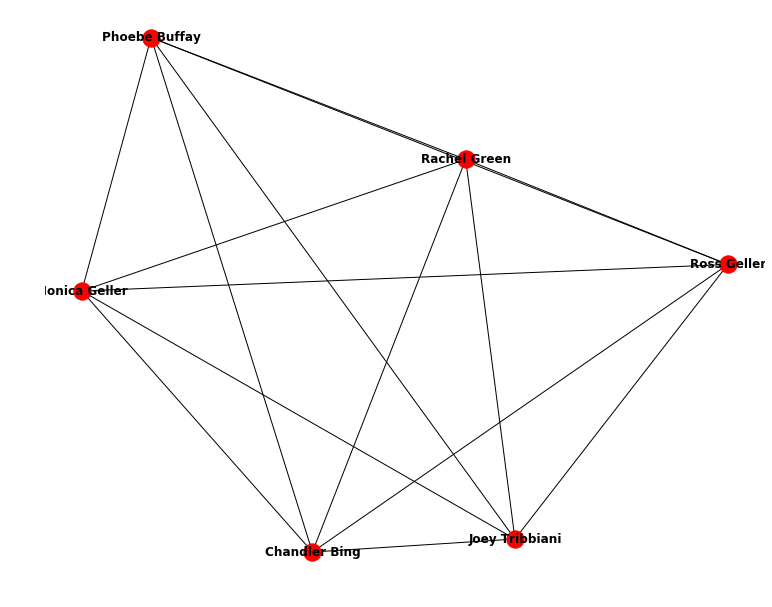

In [189]:
plt.figure(figsize=(10,8))
nx.draw(actor_network, with_labels=True, font_weight='bold')

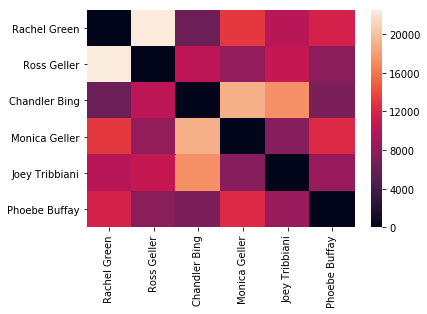

In [190]:
import seaborn as sns
L = []
for node in actor_network.nodes():
    l = []
    for node_ in actor_network.nodes():
        if node == node_:
            l.append(0)
        else:
            l.append(actor_network.edges[(node, node_)]['weight'])
    L.append(l)
M_ = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M_, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

As expected, the six friends are the lead characters who have the most conversion, and they are all close to each other. The two couples - Ross Geller and Rachel Green, and Chandler Bing and Monica Geller have stronger connections (larger weights) than other characters.

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that generate a BERT-powered chatbot tuned on text related to your final project. What is interesting about this model, and how to does it compare to an untrained model? What does it reveal about the social game involved with your dataset?

In [15]:
corpus = Corpus(filename=download("friends-corpus"))
utt_df = corpus.get_utterances_dataframe()
train_text, test_text = train_test_split(utt_df['text'], test_size=0.2)
train_text.head()

id
s06_e02_c07_u002    God, it's gonna so weird like when I come home...
s09_e17_c09_u007    Well, the gay community is a lot more vocal th...
s10_e09_c14_u001          Turns out this sweater is made for a woman.
s05_e12_c13_u002    Hey Rach! Hey, you mind if I read my comic boo...
s09_e07_c08_u011    Allright, I'm gonna watch it... I mean look, i...
Name: text, dtype: object

In [16]:
train_text.to_frame().to_csv(r'train_text_friends', header=None, index=None, sep=' ', mode='a')
test_text.to_frame().to_csv(r'test_text_friends', header=None, index=None, sep=' ', mode='a')

In [17]:
!python run_language_modelling.py --per_gpu_train_batch_size=2 --output_dir=output_gpt_friend --model_type=gpt2 --model_name_or_path=gpt2 --do_train --train_data_file=train_text_friends --do_eval --eval_data_file=test_text_friends


03/10/2022 06:15:09 - WARNING - __main__ -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: False
Downloading: 100% 665/665 [00:00<00:00, 943kB/s]
Downloading: 100% 0.99M/0.99M [00:00<00:00, 2.76MB/s]
Downloading: 100% 446k/446k [00:00<00:00, 1.46MB/s]
Downloading: 100% 523M/523M [00:09<00:00, 54.9MB/s]
03/10/2022 06:15:36 - INFO - __main__ -   Training/evaluation parameters Namespace(adam_epsilon=1e-08, block_size=1024, cache_dir=None, config_name=None, device=device(type='cuda'), do_eval=True, do_train=True, eval_all_checkpoints=False, eval_data_file='test_text_friends', evaluate_during_training=False, fp16=False, fp16_opt_level='O1', gradient_accumulation_steps=1, learning_rate=5e-05, line_by_line=False, local_rank=-1, logging_steps=500, max_grad_norm=1.0, max_steps=-1, mlm=False, mlm_probability=0.15, model_name_or_path='gpt2', model_type='gpt2', n_gpu=1, no_cuda=False, num_train_epochs=1.0, output_dir='output_gpt_friend', overwrite_cache=F

In [20]:
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer_friend = AutoTokenizer.from_pretrained("output_gpt_friend")
# If this line does not work, try tokenizer_trump = AutoTokenizer.from_pretrained("gpt2")

model_friend = AutoModelWithLMHead.from_pretrained("output_gpt_friend")

In [ ]:
tokenizer_gpt = AutoTokenizer.from_pretrained("gpt2")
model_gpt = AutoModelWithLMHead.from_pretrained("gpt2")

In [21]:
sequence = "Central Park is"

input = tokenizer_friend.encode(sequence, return_tensors="pt")
generated = model_friend.generate(input, max_length=50, bos_token_id=1, pad_token_id=1, eos_token_ids=1)

resulting_string = tokenizer_friend.decode(generated.tolist()[0])
print(resulting_string)

Central Park is a great place to get a drink."
"Oh, I'm sorry, I'm sorry. I'm sorry, I'm sorry. I'm sorry, I'm sorry. I'm sorry, I'm sorry. I'm sorry


In [22]:
sequence = "Central Park is"

input = tokenizer_gpt.encode(sequence, return_tensors="pt")
generated = model_gpt.generate(input, max_length=50, bos_token_id=1, pad_token_id=1, eos_token_ids=1)

resulting_string = tokenizer_friend.decode(generated.tolist()[0])
print(resulting_string)

Central Park is a great place to get a drink and relax.

The park is located in the heart of the city, and is a great place to get a drink and relax. The park is located in the heart of the city, and


In [23]:
sequence = "Chandeler is going to"

input = tokenizer_friend.encode(sequence, return_tensors="pt")
generated = model_friend.generate(input, max_length=50, bos_token_id=1, pad_token_id=1, eos_token_ids=1)

resulting_string = tokenizer_friend.decode(generated.tolist()[0])
print(resulting_string)

Chandeler is going to be a great guy."
"Oh, I'm sorry, I'm sorry. I'm sorry, I'm sorry. I'm sorry, I'm sorry. I'm sorry, I'm sorry. I'm sorry


In [25]:
sequence = "Chandeler is going to"

input = tokenizer_gpt.encode(sequence, return_tensors="pt")
generated = model_gpt.generate(input, max_length=50, bos_token_id=1, pad_token_id=1, eos_token_ids=1)

resulting_string = tokenizer_friend.decode(generated.tolist()[0])
print(resulting_string)

Chandeler is going to be a big part of the team.

"I think he's going to be a big part of the team," said coach Mike Krzyzewski. "He's going to be a big part of the


The trained model does not produce very reasonable results, compared to the untrained model. It always ends with 'I'm sorry...'. 

The reason for that could be: the training corpus is too small.

## <font color="red">*Exercise 4*</font>

<font color="red">What's a research question relevant to your final project that would benefit from a generative or conversational model like GPT-2 or GPT-3? What task would you have it perform, and how would you evaluate the ouput?
    
<font color="red">_Stretch:_ Do it!

For my final project, I would be exploring the impact of social media on stock market efficiency, namely, how investor behavior on social media platforms may reflect systematic bias and thus suggest predictability of asset prices. It would be interesting to use conversational model to unveil investor's perception. For example, by scraping comment/reply on Reddit, and tune a GPT2 model, we could explore generative sentence such as "The best stock to buy is...", "Gamestop is...", "Asset managers are...", "I expect the market to..." etc. It would also be helpful to see how those responses vary across time - they could provide meaningful implication for time-varing investor expectation, risk aversion and etc.